# 비지도 학습과 데이터 전처리

## 데이터 전처리와 스케일 조정

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [10]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, random_state=42) 

In [12]:
print(Xtrain.shape, Xtest.shape)

(426, 30) (143, 30)


### MinMax

In [13]:
from sklearn.preprocessing import MinMaxScaler # 전처리
scaler = MinMaxScaler() # Xtrain의 minmax와 Xtest의 minmax와 다르다
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
print(Xtrain_scaled.shape)
print("스케일 조정 전 특성별 최소최대: \n",Xtrain.min(axis=0), Xtrain.max(axis=0))
print("스케일 조정 후 특성별 최소최대: \n",Xtrain_scaled.min(axis=0),Xtrain_scaled.max(axis=0))

(426, 30)
스케일 조정 전 특성별 최소최대: 
 [7.691e+00 9.710e+00 4.792e+01 1.704e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.167e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 8.678e+00
 1.202e+01 5.449e+01 2.236e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02] [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.184e-01 9.379e-01 9.608e-01 2.910e-01
 6.638e-01 1.730e-01]
스케일 조정 후 특성별 최소최대: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
Xtest_scaled = scaler.transform(Xtest)

In [15]:
print("테스트 스케일 조정 전 특성별 최소최대: \n",Xtest.min(axis=0), Xtest.max(axis=0))
print("테스트 스케일 조정 후 특성별 최소최대: \n",Xtest_scaled.min(axis=0),Xtest_scaled.max(axis=0))

테스트 스케일 조정 전 특성별 최소최대: 
 [6.981e+00 1.038e+01 4.379e+01 1.435e+02 6.576e-02 3.558e-02 0.000e+00
 0.000e+00 1.060e-01 5.266e-02 1.166e-01 3.628e-01 7.714e-01 8.955e+00
 3.169e-03 5.656e-03 0.000e+00 0.000e+00 9.539e-03 1.219e-03 7.930e+00
 1.249e+01 5.041e+01 1.852e+02 8.799e-02 5.494e-02 0.000e+00 0.000e+00
 1.566e-01 5.905e-02] [2.522e+01 3.112e+01 1.715e+02 1.878e+03 1.371e-01 3.454e-01 3.754e-01
 1.845e-01 2.906e-01 8.243e-02 1.291e+00 3.896e+00 9.635e+00 1.997e+02
 1.604e-02 1.064e-01 3.038e-01 3.322e-02 7.895e-02 2.286e-02 3.249e+01
 4.716e+01 2.140e+02 3.432e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 5.440e-01 2.075e-01]
테스트 스케일 조정 후 특성별 최소최대: 
 [-0.03477154  0.0226581  -0.02937829 -0.01154209  0.1185339   0.05547565
  0.          0.         -0.0571276   0.05686605  0.00184682  0.00057461
  0.00067851  0.00402131  0.04949519  0.02556554  0.          0.
  0.03092687  0.01120048 -0.02733718  0.01252665 -0.02074119 -0.00952759
  0.11424302  0.03036426  0.          0.          0.00

## 차원축소, 특성 추출, 매니폴드 학습

In [16]:
#!pip install koreanize_matplotlib

In [22]:
import sklearn
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 주성분 분석(PCA)
이미지에서 많이 사용됨

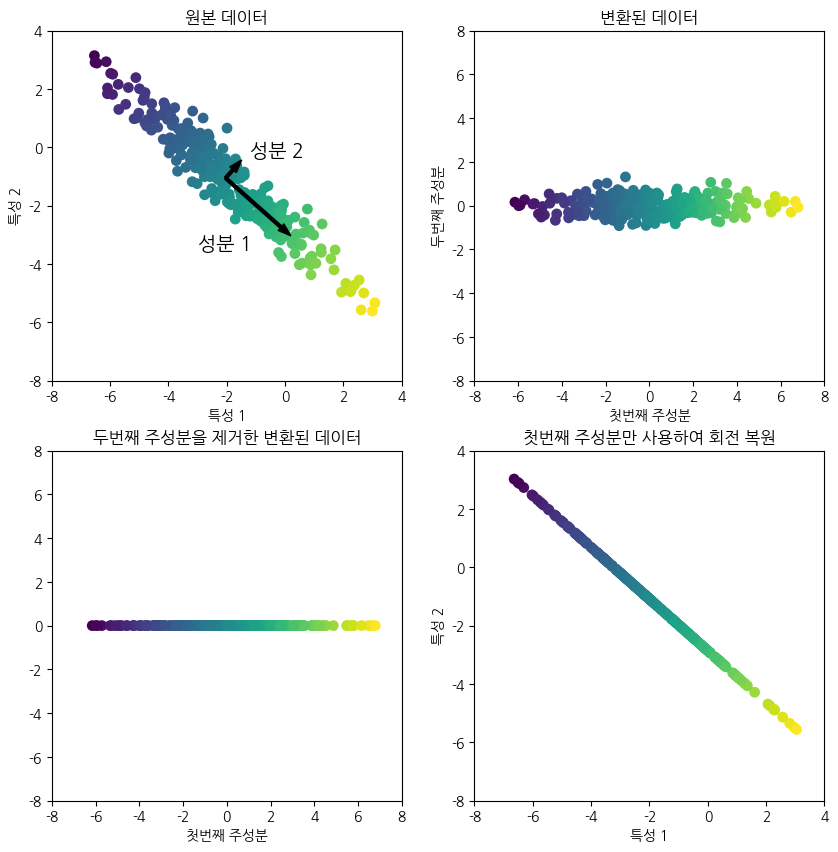

In [18]:
mglearn.plots.plot_pca_illustration()

#### PCA로 유방암 데이터셋 시각화
PCA를 돌린후 특성들의 발현을 보고난 뒤 차원 축소

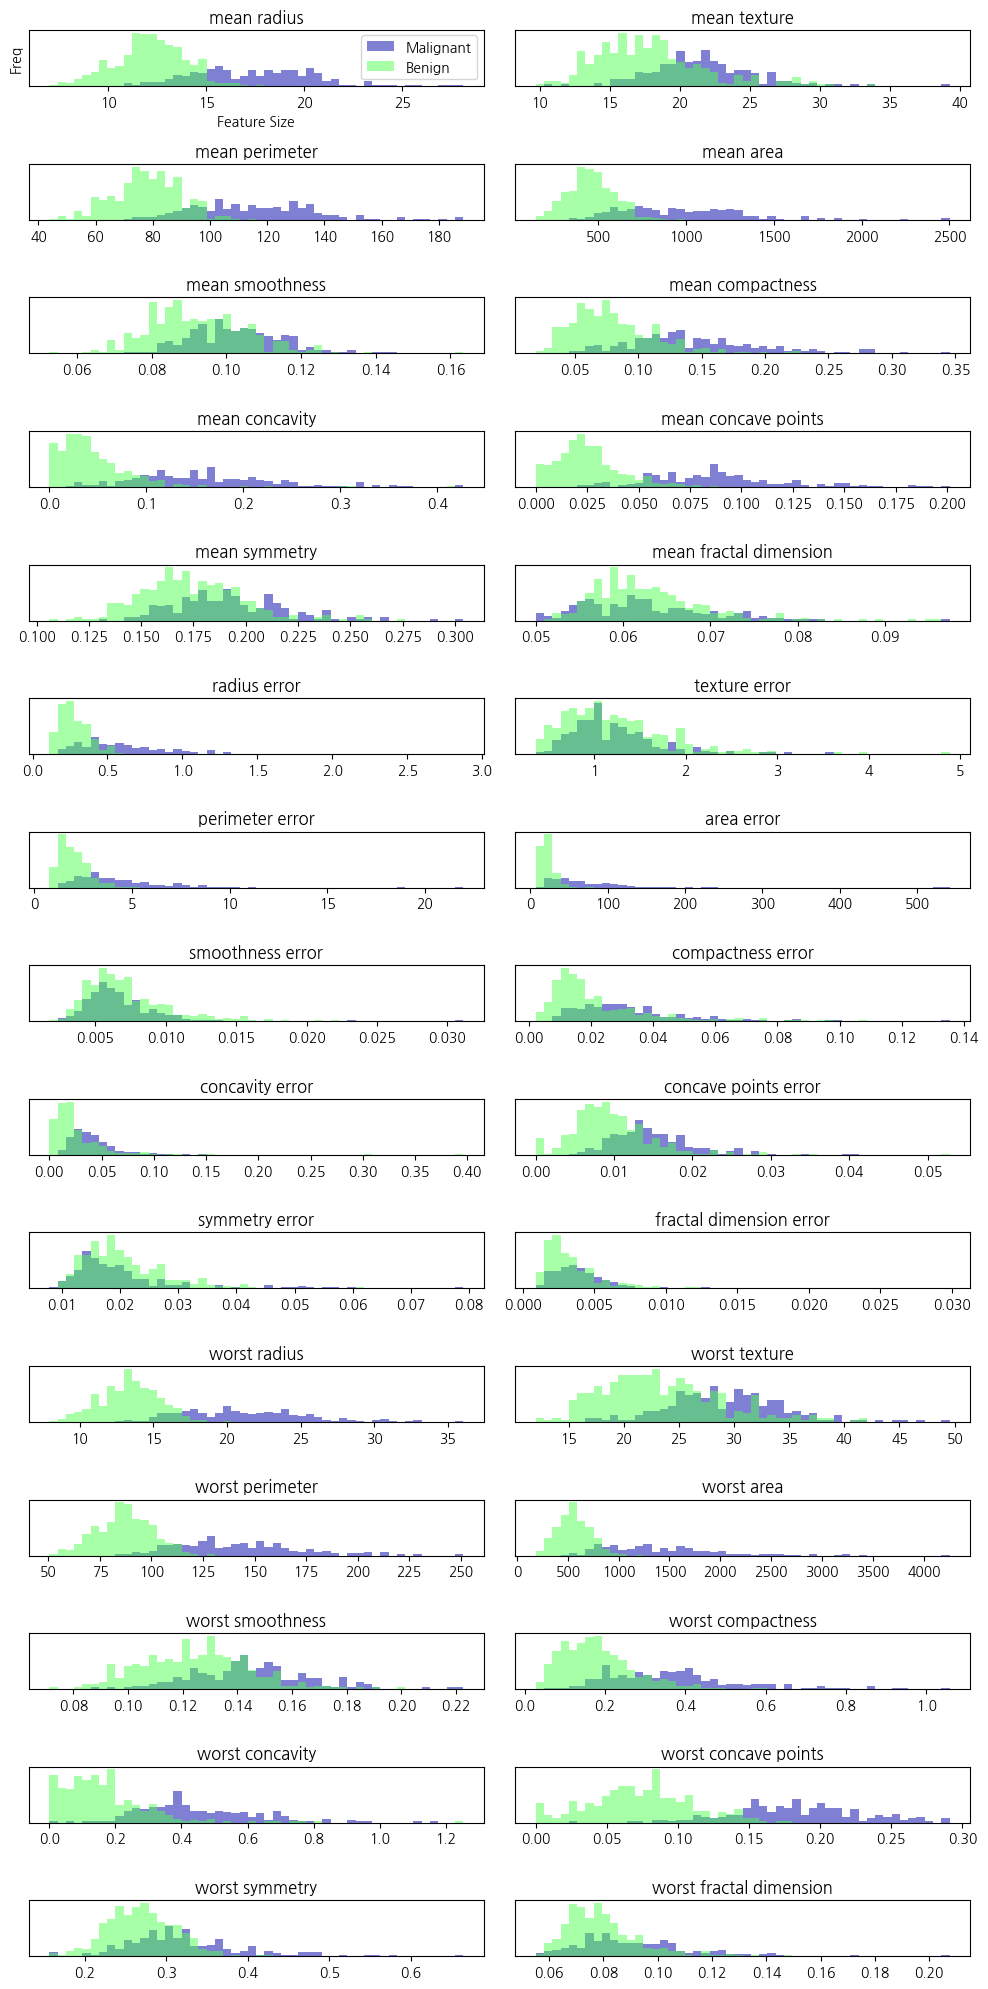

In [24]:
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature Size")
ax[0].set_ylabel("Freq")
ax[0].legend(["Malignant","Benign"],loc="best")
fig.tight_layout()

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: ", str(X_scaled.shape))
print("축소된 데이터 형태: ", str(X_pca.shape))

원본 데이터 형태:  (569, 30)
축소된 데이터 형태:  (569, 2)


Text(0, 0.5, '2nd')

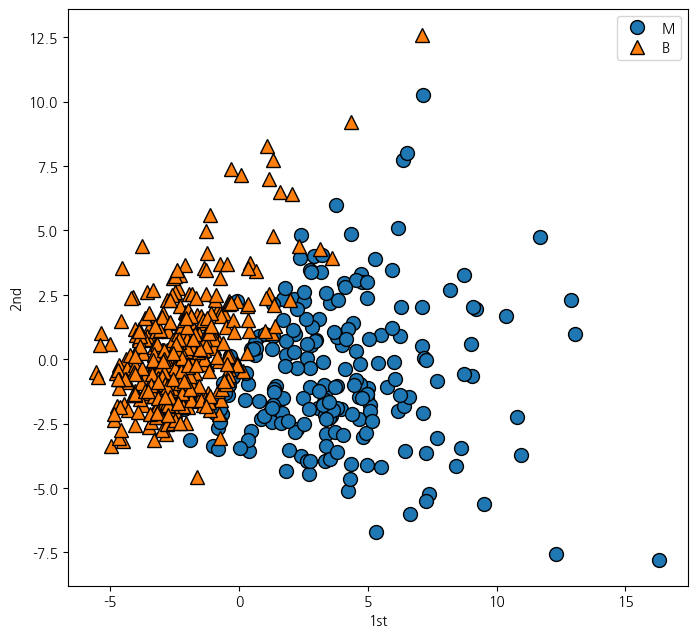

In [30]:
#클래스를 색깔로 구분하여 처음 두개의 주성분을 그래프로 나타낸다
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
plt.legend(["M","B"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st")
plt.ylabel("2nd")